# SOLUCIONS NUMÈRIQUES PER A UN POU POTENCIAL DOBLE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# El potencial mínim del pou doble presenta l'estructura V = b·x⁴-c·x²
def getV(x):
    b = 1
    c = 6
    potvalue = b*x**4-c*x**2
    return potvalue

In [3]:
# Discretitzem la equació de Schrödinger en n punts ( de 0 a n-1)
def Eq(n,h,x):
    F = np.zeros([n,n])
    for i in range(0,n):
        F[i,i] = -2*((h**2)*getV(x[i]) + 1)
        if i > 0:
           F[i,i-1] = 1
           if i < n-1:
              F[i,i+1] = 1
    return F

In [4]:
# Els intervals per calcular la funció d'ona[-L/2,L/2]
L = 8
xlower = -L/2.0
xupper = L/2.0

#paràmetre discretització
h = 0.02  

#Coordenades per obtenir solució numèrica
x = np.arange(xlower,xupper+h,h)
#grid size (how many discrete points to use in the range [-L/2,L/2])
npoints=len(x)

print("Using",npoints, "grid points.")

Using 401 grid points.


In [5]:
#Càlcul de la forma discreta de la equació de Schrödinger i diagonalizació
F=Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Valors propis en ordre
# w ordered eigenvalues and vs ordered eigenvectors
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

#Nivells energia
E = - w/(2.0*h**2)

In [9]:
#Nivells energia
E = - w/(2.0*h**2)
for k in range(0,5):
  print("n=",k,", E(numeric)=%.4f" %E[k])

n= 0 , E(numeric)=-6.6430
n= 1 , E(numeric)=-6.6409
n= 2 , E(numeric)=-2.4521
n= 3 , E(numeric)=-2.3166
n= 4 , E(numeric)=0.4143


Plotting


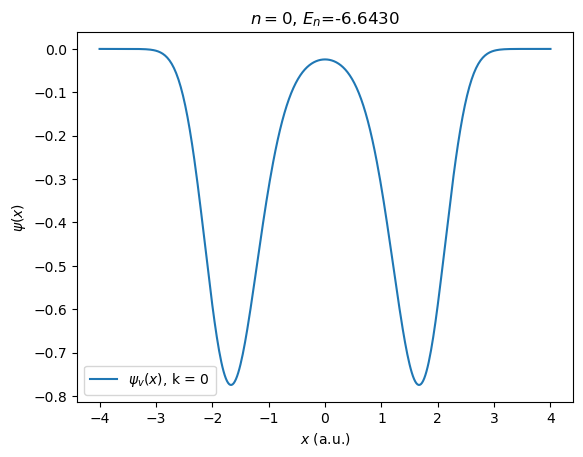

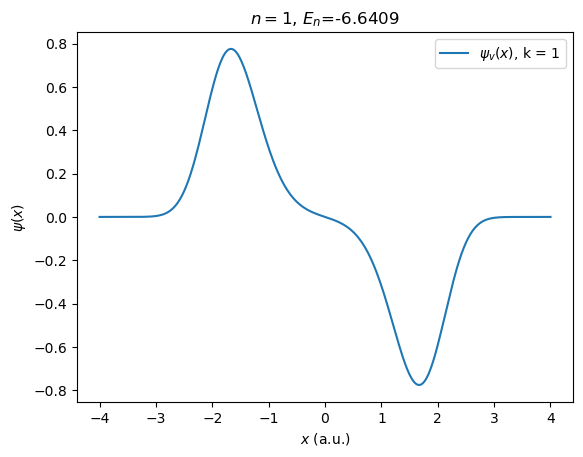

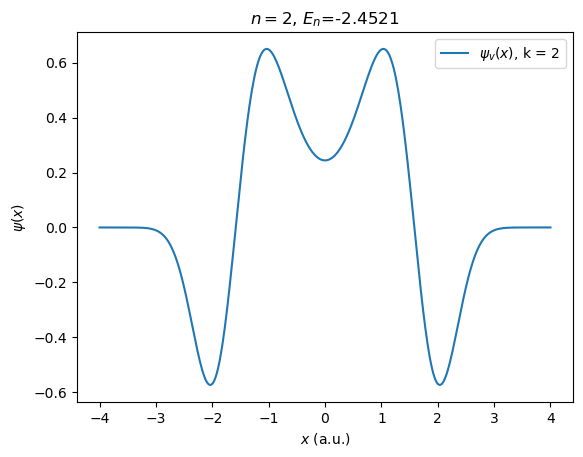

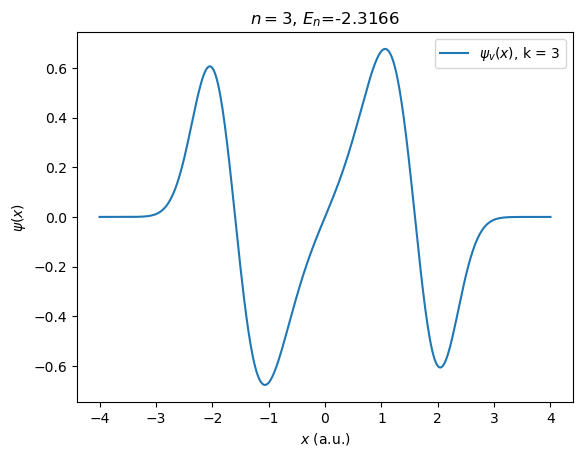

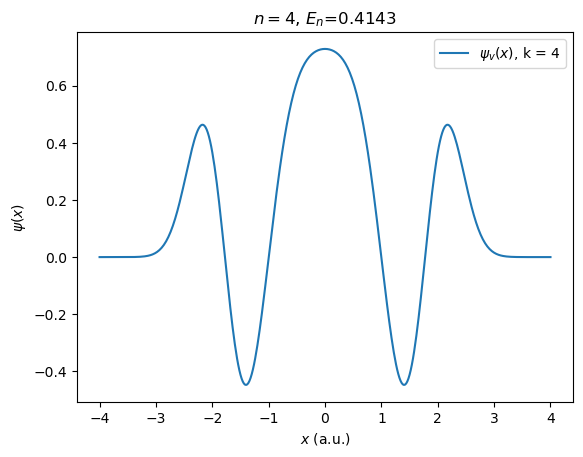

In [7]:
#Init Wavefunction (empty list with npoints elements)
psi = [None]*npoints

#Calculation of normalised Wave Functions
for k in range(0,len(w)):
	psi[k] = vs[:,k]
	integral = h*np.dot(psi[k],psi[k])
	psi[k] = psi[k]/integral**0.5

#Plot Wave functions
print("Plotting")

#v = int(input("\n Quantum Number (enter 0 for ground state):\n>"))
for v in range(0,5):
	plt.plot(x,psi[v],label=r'$\psi_v(x)$, k = ' + str(v))
	plt.title(r'$n=$'+ str(v) + r', $E_n$=' + '{:.4f}'.format(E[v]))
	plt.legend()
	plt.xlabel(r'$x$ (a.u.)')
	plt.ylabel(r'$\psi(x)$')
	plt.show()



La discretització utilitzada ha estat de h = 0,02. Els resultats han estat instantànis.

He augmentat la discretització un ordre de magnitud (h=0,2) i el resultat ha estat que les gràfiques es veuen més triangulars (menys definides). Pel que fa al temps de càlcul, els resultats han estat instantànis. Els resultats canvien per n=1 i n=2 en el segon decimal i per n=3 i n=4 en el primer decimal.

A més, he disminuit la discretització un ordre magnitud (h=0.002), per tant, la discretització és més fina però al augmentar la mida de la matriu el temps d'obtenció dels resultats ha sigut molt més llarg. Els resultats han estat exactament iguals que amb h=0,02 fins al segon decimal.

D'aquesta manera, considero que el valor de discretització més adient és h = 0,02 perquè els resultats són ràpids i disminuint la h el resultat pràcticament no varia.